In [93]:
import pandas as pd
import time
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from nltk.classify import NaiveBayesClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
data = pd.read_csv('cleaned.csv')
tok = RegexpTokenizer(r'[a-zA-Z0-9]+')
vector = CountVectorizer(stop_words='english',
                         ngram_range = (1,3),
                         tokenizer = tok.tokenize)
text = vector.fit_transform(data['text'])
#Splitting trainig and testing
X_train, X_test, Y_train, Y_test = train_test_split(text, data['rating'], test_size=0.20, random_state=41)
#Training the model
model = LogisticRegression() #MultinomialNB()#LinearSVC()
start = time.time()
model.fit(X_train, Y_train)
end = time.time()
#Caluclating the accuracy score of the model
pred = model.predict(X_test)
accscore = metrics.accuracy_score(pred, Y_test)
#print("OH MY GOD, let check the Accuracuy Score: ",accscore)
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
print(classification_report(Y_test, pred))
print("Accuracy Score:", model.score(X_test,Y_test))

C:\Users\andy\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


The execution time of this model is 1.93 seconds

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       974
           1       0.72      0.75      0.74      1026

    accuracy                           0.73      2000
   macro avg       0.73      0.72      0.72      2000
weighted avg       0.73      0.73      0.73      2000

Accuracy Score: 0.7255


In [92]:
from sklearn.linear_model import RidgeCV, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from time import time
import pandas as pd
import numpy as np
import math
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
#============================================
# perform a pre-selection
#============================================
data = pd.read_csv('cleaned.csv')
tok = RegexpTokenizer(r'[a-zA-Z0-9]+')
vector = CountVectorizer(stop_words='english',
                         ngram_range = (1,3),
                         tokenizer = tok.tokenize)
text = vector.fit_transform(data['text'])
X_train, X_test, Y_train, Y_test = train_test_split(text, data['rating'], test_size=0.20, random_state=42)


C:\Users\andy\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [72]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from time import time
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [73]:
##+======================================

classifiers = [

    MultinomialNB(), 
    LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier()
]

models = []
outcome = pd.DataFrame(columns = models)
results = []

num = len(classifiers)
i =0
for model in classifiers[:num]:
    i+=1
    start = time()
    modelname = model.__class__.__name__
    print(modelname)
    model.fit(X_train ,Y_train)
    train_time = time() - start
    
    start = time()
    Y_pred = model.predict(X_test) 
    predict_time = time()-start
         
    outcome.loc[i,'Model Name'] = modelname
    outcome.loc[i,'Training Time'] = train_time
    outcome.loc[i,'Prediction time'] = predict_time
    outcome.loc[i,'F1 score'] = f1_score(Y_test, Y_pred, average='weighted')
    outcome.loc[i, 'Train Accuracy'] = round(model.score(X_train, Y_train) * 100, 4)  #xtrain_pca   
    outcome.loc[i,'Test Accuracy'] =  round(model.score(X_test, Y_test) * 100, 4)

    print(" Accuracy Score:", model.score(X_test,Y_test))
    print("\n")

     
# display the result    
outcome

MultinomialNB
 Accuracy Score: 0.7064


LogisticRegression
 Accuracy Score: 0.7236


KNeighborsClassifier
 Accuracy Score: 0.53


RandomForestClassifier
 Accuracy Score: 0.6908


AdaBoostClassifier
 Accuracy Score: 0.6576


DecisionTreeClassifier
 Accuracy Score: 0.6664


GradientBoostingClassifier
 Accuracy Score: 0.6832




,Model Name,Training Time,Prediction time,F1 score,Train Accuracy,Test Accuracy
1,MultinomialNB,0.014442,0.002013,0.705928,99.3867,70.64
2,LogisticRegression,1.501993,0.001000,0.723550,99.6667,72.36
3,KNeighborsClassifier,0.001021,0.559167,0.410769,57.4800,53.00
4,RandomForestClassifier,225.526213,0.498998,0.690770,99.9733,69.08
5,AdaBoostClassifier,103.434068,0.054078,0.638110,67.0800,65.76
6,DecisionTreeClassifier,20.325191,0.003000,0.665625,99.9733,66.64
7,GradientBoostingClassifier,234.056040,0.008792,0.672475,71.3600,68.32


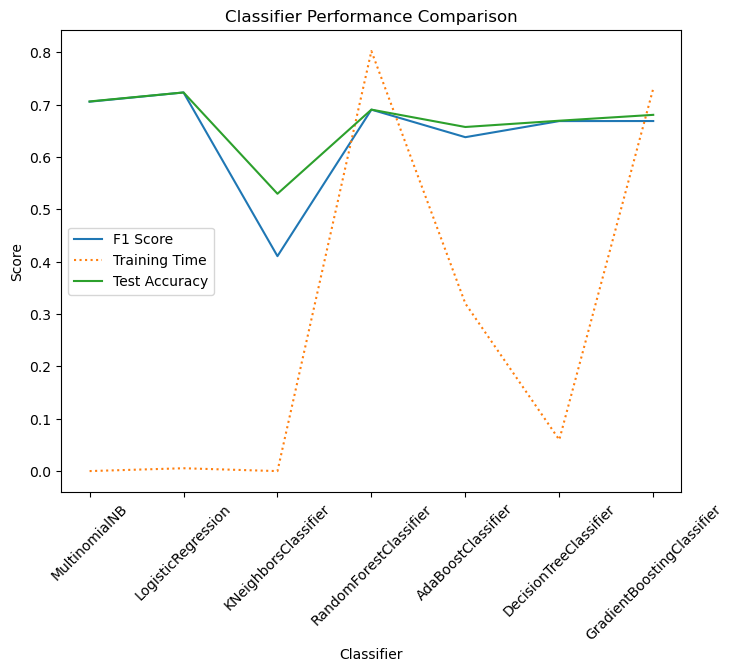

In [91]:
import matplotlib.pyplot as plt
results =models_compare

# Plot the results
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(results['Model Name'], results['F1 score'], label='F1 Score')
ax.plot(results['Model Name'], results['Training Time'] /300, linestyle=':', label='Training Time')
ax.plot(results['Model Name'], results['Test Accuracy'] /100, label='Test Accuracy')

ax.set_xlabel('Classifier')
ax.set_ylabel('Score')
ax.set_title('Classifier Performance Comparison')
ax.legend()
plt.xticks(rotation=45)
plt.show()